# Test Performance

In [2]:
import torch
import matplotlib.pyplot as plt
from Utils import ID_generator
from Comparison_models import MGP_BDI, MHGP_BC, MHGP_BDI, UGP_BDI, UHGP_BC, UHGP_BDI
plt.style.use("ggplot")

## SweepObjects

In [8]:
mhgp_bdi = MHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/MHGP-BDI/0")
mhgp_bdi.test_results(ID="3/20210928_092541")

uhgp_bdi = UHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/UHGP-BDI/0")
uhgp_bdi.test_results(ID="3/20210928_10533")

mgp_bdi = MGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/MGP-BDI/0")
mgp_bdi.test_results(ID="3/20210825_154724")

ugp_bdi = UGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/UGP-BDI/0")
ugp_bdi.test_results(ID="3/20210927_150723")

mhgp_bc = MHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/MHGP-BC/0")
mhgp_bc.test_results(ID="3/20210825_150711")

uhgp_bc = UHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/SweepObject/UHGP-BC/0")
uhgp_bc.test_results(ID="3/20210928_153321")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [13]:
print(mhgp_bdi.success_rate)
print(uhgp_bdi.success_rate)
print(mgp_bdi.success_rate)
print(ugp_bdi.success_rate)
print(mhgp_bc.success_rate)
print(uhgp_bc.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(0.), 'std': tensor(0.)}
{'mean': tensor(100.), 'std': tensor(nan)}
{'mean': tensor(0.), 'std': tensor(0.)}
{'mean': tensor(50.), 'std': tensor(0.)}
{'mean': tensor(0.), 'std': tensor(0.)}


/Users/hanbit-o/.pyenv/versions/3.8.3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


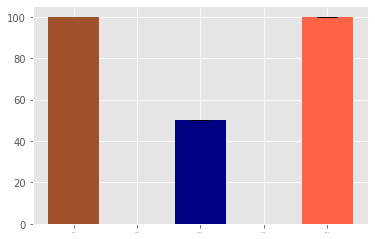

In [12]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar([mgp_bdi.name],[mgp_bdi.success_rate['mean']],yerr=mgp_bdi.success_rate['std'],capsize = 10,color=mgp_bdi.color)
bar_ugp_bdi = plt.bar([ugp_bdi.name],[ugp_bdi.success_rate['mean']],yerr=ugp_bdi.success_rate['std'],capsize = 10,color=ugp_bdi.color)
bar_mhgp_bc = plt.bar([mhgp_bc.name],[mhgp_bc.success_rate['mean']],yerr=mhgp_bc.success_rate['std'],capsize = 10,color=mhgp_bc.color)
bar_uhgp_bc = plt.bar([uhgp_bc.name],[uhgp_bc.success_rate['mean']],yerr=uhgp_bc.success_rate['std'],capsize = 10,color=uhgp_bc.color)
bar_uhgp_bdi = plt.bar([uhgp_bdi.name],[uhgp_bdi.success_rate['mean']],yerr=uhgp_bdi.success_rate['std'],capsize = 10,color=uhgp_bdi.color)
bar_mhgp_bdi = plt.bar([mhgp_bdi.name],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/SweepObject/Performance/"+ID+".pdf")

## ObstacleAvoidance

In [19]:
mhgp_bdi = MHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0")
mhgp_bdi.test_results(ID="3/20210901_112038")

uhgp_bdi = UHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/UHGP-BDI/0")
# uhgp_bdi.test_results(ID="2/20210829_130024")

mgp_bdi = MGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MGP-BDI/0")
# mgp_bdi.test_results(ID="3/20210825_154724")

ugp_bdi = UGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/UGP-BDI/0")
# ugp_bdi.test_results(ID="3/20210927_150723")

mhgp_bc = MHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BC/0")
mhgp_bc.test_results(ID="3/20210901_113538")

uhgp_bc = UHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/UHGP-BC/0")
# uhgp_bc.test_results(ID="3/20210928_153321")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [20]:
print(mhgp_bdi.success_rate)
print(mhgp_bc.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(70.), 'std': tensor(14.1421)}


/Users/hanbit-o/.pyenv/versions/3.8.3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


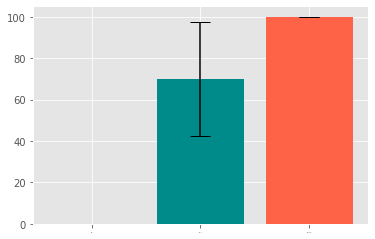

In [61]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(["MGP"],[torch.zeros(1)],yerr=torch.zeros(1),capsize = 10,color="navy")
bar_mhgp_bc = plt.bar([mhgp_bc.name],[mhgp_bc.success_rate['mean']],yerr=mhgp_bc.success_rate['std'],capsize = 10,color=mhgp_bc.color)
bar_mhgp_bdi = plt.bar([mhgp_bdi.name],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/Obstacle_Avoidance/Performance/"+ID+".pdf")

## ShaftInsertion

In [14]:
mhgp_bdi = MHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BDI/0")
mhgp_bdi.test_results(ID="5/20210831_185113")

uhgp_bdi = UHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/UHGP-BDI/0")
uhgp_bdi.test_results(ID="5/20210831_185935")

mgp_bdi = MGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MGP-BDI/0")
# mgp_bdi.test_results(ID="3/20210825_154724")

ugp_bdi = UGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/UGP-BDI/0")
# ugp_bdi.test_results(ID="3/20210927_150723")

mhgp_bc = MHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BC/0")
mhgp_bc.test_results(ID="5/20210831_184520")

uhgp_bc = UHGP_BC(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/UHGP-BC/0")
# uhgp_bc.test_results(ID="3/20210928_153321")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [15]:
print(mhgp_bdi.success_rate)
print(uhgp_bdi.success_rate)
# print(mgp_bdi.success_rate)
# print(ugp_bdi.success_rate)
print(mhgp_bc.success_rate)
# print(uhgp_bc.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(0.), 'std': tensor(nan)}
{'mean': tensor(70.), 'std': tensor(14.1421)}


/Users/hanbit-o/.pyenv/versions/3.8.3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


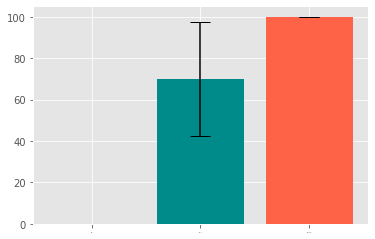

In [64]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(["MGP"],[torch.zeros(1)],yerr=torch.zeros(1),capsize = 10,color="navy")
bar_mhgp_bc = plt.bar([mhgp_bc.name],[mhgp_bc.success_rate['mean']],yerr=mhgp_bc.success_rate['std'],capsize = 10,color=mhgp_bc.color)
bar_mhgp_bdi = plt.bar([mhgp_bdi.name],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/ShaftInsertion/Performance/"+ID+".pdf")